# Variational Gaussian Model

Comparing VI performance with different numbers of iterates for estimating the elbo.

**WARNING: The stopping rule is disabled so this notebook takes a long time to run.**

In [1]:
import math
import torch

import matplotlib.pyplot as plt

from ptvi import UnivariateGaussian, NullStoppingHeuristic, ExponentialStoppingHeuristic

stop_heur = NullStoppingHeuristic()
max_iter = 2**13

Simulate data, which will be common for all models. Mean and sd are shown below.

In [2]:
torch.manual_seed(123)
N, μ0, σ0 = 100, 5., 5.
η0 = math.log(σ0)
y = UnivariateGaussian().simulate(N=N, μ0=μ0, σ0=σ0)

## Analytic entropy term

In [3]:
model = UnivariateGaussian(num_draws=1, stochastic_entropy=False,
                           stop_heur=stop_heur)
result = model.training_loop(y, max_iters=max_iter)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Structured SGVB Inference

Univariate Gaussian model:
  - Analytic entropy term with M=1;
  - Null stopping heuristic (never fires)
  - Adadelta optimizer with param groups:
    group 0. lr=1.0, rho=0.9, eps=1e-06, weight_decay=0

Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed elbo_hat =  -274842.09
       1. smoothed elbo_hat =  -252522.98
       2. smoothed elbo_hat =  -227341.67
       4. smoothed elbo_hat =  -186000.70
       8. smoothed elbo_hat =  -123478.79
      16. smoothed elbo_hat =   -60200.65
      32. smoothed elbo_hat =   -14761.73
      64. smoothed elbo_hat =    -4377.82
     128. smoothed elbo_hat =   -14280.08
     256. smoothed elbo_hat =    -5198.52
     512. smoothed elbo_hat =    -2393.03
    1024. smoothed elbo_hat =     -942.80
    2048. smoothed elbo_hat =     -326.98
    4096. smoothed elbo

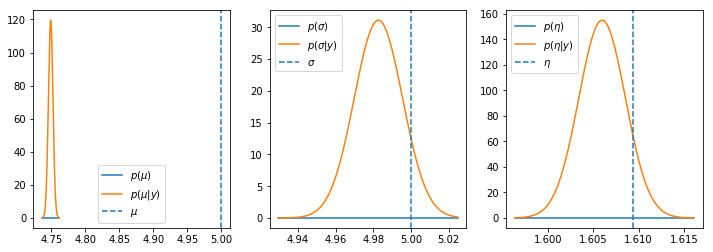

In [4]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.subplot(131); result.plot_marg_post('μ', true_val=μ0)
plt.subplot(132); result.plot_marg_post('σ', true_val=σ0)
plt.subplot(133); result.plot_marg_post('η', true_val=η0)

## Stochastic entropy term

### elbo estimated with 1 draw

In [5]:
model_s1 = UnivariateGaussian(num_draws=1, stochastic_entropy=True, stop_heur=stop_heur)
result_s1 = model_s1.training_loop(y, max_iters=max_iter)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Structured SGVB Inference

Univariate Gaussian model:
  - Stochastic entropy term with M=1;
  - Null stopping heuristic (never fires)
  - Adadelta optimizer with param groups:
    group 0. lr=1.0, rho=0.9, eps=1e-06, weight_decay=0

Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed elbo_hat =  -225808.22
       1. smoothed elbo_hat =  -203263.06
       2. smoothed elbo_hat =  -194418.45
       4. smoothed elbo_hat =  -159292.09
       8. smoothed elbo_hat =  -104760.21
      16. smoothed elbo_hat =   -63437.94
      32. smoothed elbo_hat =   -21629.56
      64. smoothed elbo_hat =   -30083.95
     128. smoothed elbo_hat =   -33915.68
     256. smoothed elbo_hat =   -29315.95
     512. smoothed elbo_hat =    -4103.21
    1024. smoothed elbo_hat =    -2061.80
    2048. smoothed elbo_hat =     -352.86
    4096. smoothed el

### elbo estimated with 10 draws

In [6]:
model_s10 = UnivariateGaussian(num_draws=10, stochastic_entropy=True, stop_heur=stop_heur)
result_s10 = model_s10.training_loop(y, max_iters=max_iter)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Structured SGVB Inference

Univariate Gaussian model:
  - Stochastic entropy term with M=10;
  - Null stopping heuristic (never fires)
  - Adadelta optimizer with param groups:
    group 0. lr=1.0, rho=0.9, eps=1e-06, weight_decay=0

Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed elbo_hat =    -2918.21
       1. smoothed elbo_hat =    -8179.16
       2. smoothed elbo_hat =    -7624.18
       4. smoothed elbo_hat =    -6965.34
       8. smoothed elbo_hat =   -13927.51
      16. smoothed elbo_hat =   -14034.47
      32. smoothed elbo_hat =   -22481.79
      64. smoothed elbo_hat =   -12223.79
     128. smoothed elbo_hat =   -12110.40
     256. smoothed elbo_hat =    -6588.39
     512. smoothed elbo_hat =    -1678.93
    1024. smoothed elbo_hat =     -329.14
    2048. smoothed elbo_hat =     -310.45
    4096. smoothed e

### elbo estimated with 100 draws

In [7]:
model_s100 = UnivariateGaussian(num_draws=100, stochastic_entropy=True, stop_heur=stop_heur)
result_s100 = model_s100.training_loop(y, max_iters=max_iter)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Structured SGVB Inference

Univariate Gaussian model:
  - Stochastic entropy term with M=100;
  - Null stopping heuristic (never fires)
  - Adadelta optimizer with param groups:
    group 0. lr=1.0, rho=0.9, eps=1e-06, weight_decay=0

Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed elbo_hat =   -21054.07
       1. smoothed elbo_hat =   -19854.44
       2. smoothed elbo_hat =   -19090.01
       4. smoothed elbo_hat =   -18518.07
       8. smoothed elbo_hat =   -16754.72
      16. smoothed elbo_hat =   -16589.05
      32. smoothed elbo_hat =   -11835.58
      64. smoothed elbo_hat =   -10361.28
     128. smoothed elbo_hat =    -5455.37
     256. smoothed elbo_hat =    -1961.60
     512. smoothed elbo_hat =     -452.82
    1024. smoothed elbo_hat =     -317.43
    2048. smoothed elbo_hat =     -310.42
    4096. smoothed 

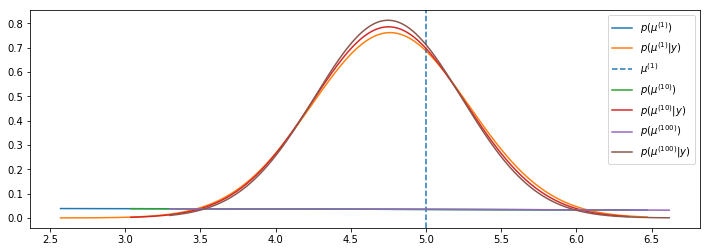

In [8]:
result_s1.plot_marg_post('μ', suffix='^{(1)}', true_val=μ0)
result_s10.plot_marg_post('μ', suffix='^{(10)}')
result_s100.plot_marg_post('μ', suffix='^{(100)}')

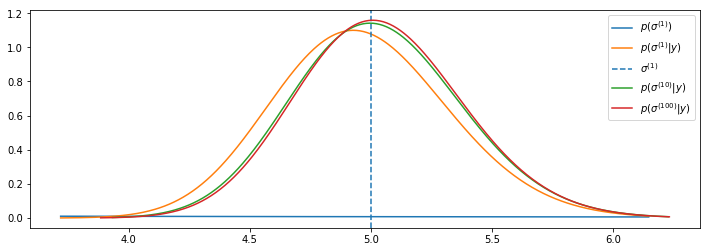

In [9]:
result_s1.plot_marg_post('σ', suffix='^{(1)}', true_val=σ0)
result_s10.plot_marg_post('σ', suffix='^{(10)}', plot_prior=False)
result_s100.plot_marg_post('σ', suffix='^{(100)}', plot_prior=False)

Putting these charts together we see that the marginal posteriors with the analytic posterior is kinda ridiculous.

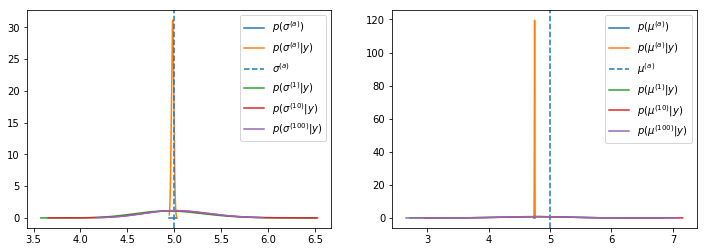

In [10]:
plt.subplot(121)
result.plot_marg_post('σ', suffix='^{(a)}', true_val=σ0)
result_s1.plot_marg_post('σ', suffix='^{(1)}', plot_prior=False)
result_s10.plot_marg_post('σ', suffix='^{(10)}', plot_prior=False)
result_s100.plot_marg_post('σ', suffix='^{(100)}', plot_prior=False)

plt.subplot(122)
result.plot_marg_post('μ', suffix='^{(a)}', true_val=μ0)
result_s1.plot_marg_post('μ', suffix='^{(1)}', plot_prior=False)
result_s10.plot_marg_post('μ', suffix='^{(10)}', plot_prior=False)
result_s100.plot_marg_post('μ', suffix='^{(100)}', plot_prior=False)